## 데이터 불러오기 & 확인하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..

/


In [ ]:
%cd content/drive/MyDrive/seoulbike

/content/drive/MyDrive/seoulbike


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')
sub = pd.read_csv('./data/submission.csv')

In [ ]:
df_train.head(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
df_test.head(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


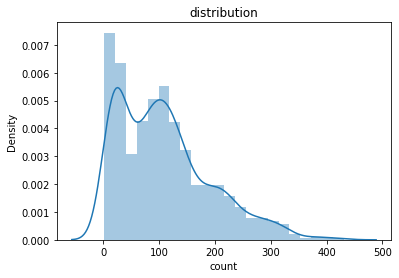

In [ ]:
plt.title('distribution')
sns.distplot(df_train['count'])

In [ ]:
'''
df_train['count'] = np.log1p(df_train['count'])
plt.title('distribution')
sns.distplot(df_train['count'])
'''

"\ndf_train['count'] = np.log1p(df_train['count'])\nplt.title('distribution')\nsns.distplot(df_train['count'])\n"

## 결측치 확인하기

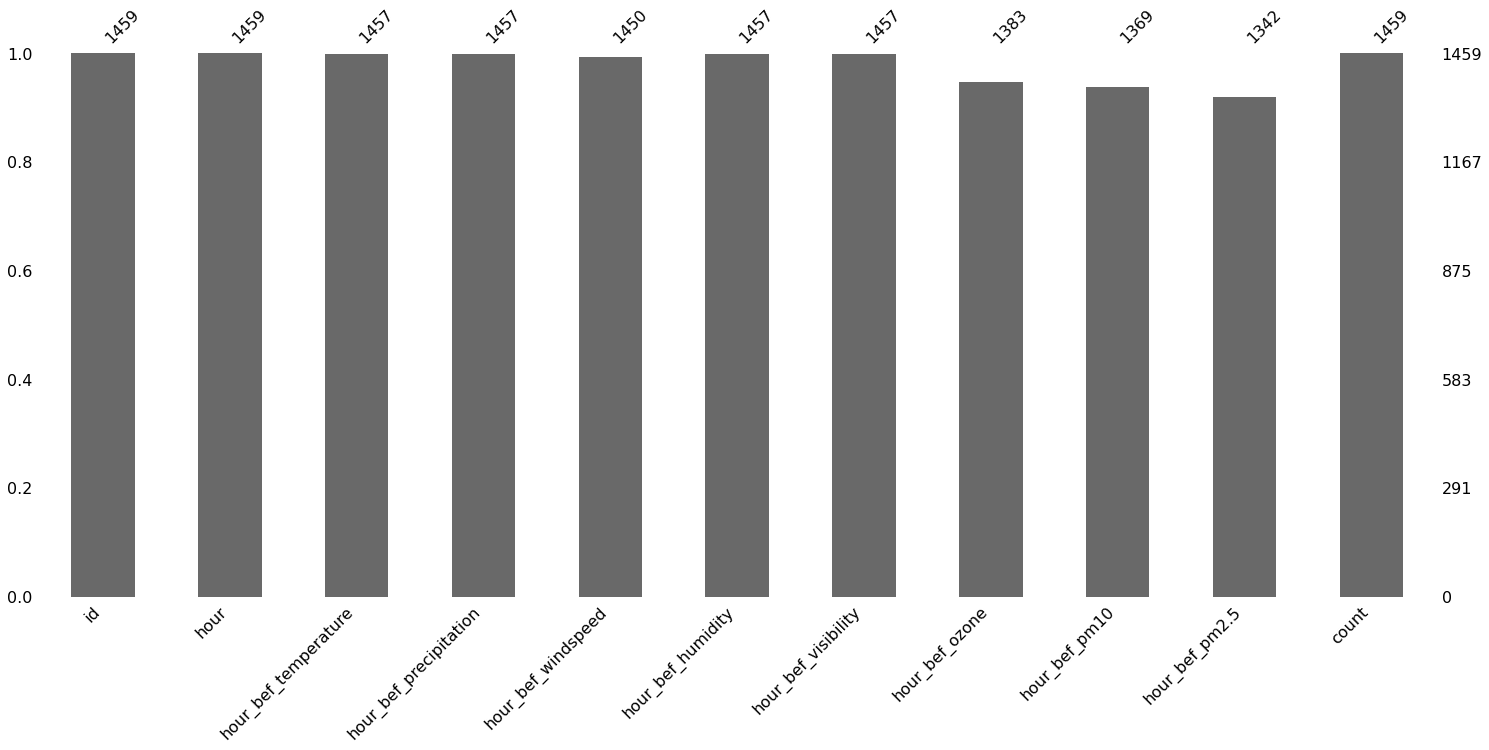

In [ ]:
msno.bar(df_train) #그래프로 결측치 관찰

In [ ]:
df_train.isnull().sum() #train의 결측치

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
df_test.isnull().sum() #test의 결측치

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
# pandas의 describe 함수는 각 열의 통계를 찾음
df_train.describe() 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
df_test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


##  결측치 채우기 (KNN)

In [ ]:
from impyute.imputation.cs import fast_knn

imputed_train=fast_knn(df_train.values, k=9)
imputed_test=fast_knn(df_test.values, k=9)

In [ ]:
imputed_train_df = pd.DataFrame(imputed_train)
imputed_test_df = pd.DataFrame(imputed_test)

In [ ]:
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_temperature'][i]) == True:
    df_train['hour_bef_temperature'][i] = imputed_train_df[2][i]
  
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_precipitation'][i]) == True:
    df_train['hour_bef_precipitation'][i] = imputed_train_df[3][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_windspeed'][i]) == True:
    df_train['hour_bef_windspeed'][i] = imputed_train_df[4][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_humidity'][i]) == True:
    df_train['hour_bef_humidity'][i] = imputed_train_df[5][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_visibility'][i]) == True:
    df_train['hour_bef_visibility'][i] = imputed_train_df[6][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_ozone'][i]) == True:
    df_train['hour_bef_ozone'][i] = imputed_train_df[7][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_pm10'][i]) == True:
    df_train['hour_bef_pm10'][i] = imputed_train_df[8][i]
    
for i in range(len(df_train)):
  if np.isnan(df_train['hour_bef_pm2.5'][i]) == True:
    df_train['hour_bef_pm2.5'][i] = imputed_train_df[9][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

In [ ]:
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_temperature'][i]) == True:
    df_test['hour_bef_temperature'][i] = imputed_test_df[2][i]
  
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_precipitation'][i]) == True:
    df_test['hour_bef_precipitation'][i] = imputed_test_df[3][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_windspeed'][i]) == True:
    df_test['hour_bef_windspeed'][i] = imputed_test_df[4][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_humidity'][i]) == True:
    df_test['hour_bef_humidity'][i] = imputed_test_df[5][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_visibility'][i]) == True:
    df_test['hour_bef_visibility'][i] = imputed_test_df[6][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_ozone'][i]) == True:
    df_test['hour_bef_ozone'][i] = imputed_test_df[7][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_pm10'][i]) == True:
    df_test['hour_bef_pm10'][i] = imputed_test_df[8][i]
    
for i in range(len(df_test)):
  if np.isnan(df_test['hour_bef_pm2.5'][i]) == True:
    df_test['hour_bef_pm2.5'][i] = imputed_test_df[9][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

## 결측치 채우기 (SVM)

## 결측치 채우기 (평균)

In [ ]:
df_train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
0,3,20,16.3,1.0,1.5,89.0,576.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,431.0
...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,216.0


In [ ]:
del df_train['hour_bef_ozone']
del df_train['hour_bef_pm10']
del df_train['hour_bef_pm2.5']
#결측치가 너무 많거나 채우기 힘든 column 삭제

KeyError: ignored

In [ ]:
#온도(temperature) 결측치 채우기
df_train[df_train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df_train.groupby('hour').mean()['hour_bef_temperature'] #시간별 온도의 평균

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

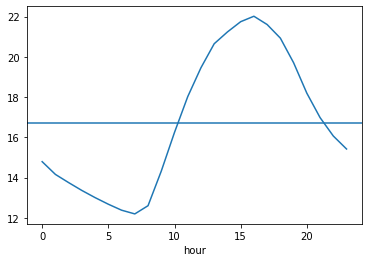

In [ ]:
df_train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(df_train.groupby('hour').mean()['hour_bef_temperature'].mean())
#전체 평균을 수평선으로 시각화

In [ ]:
df_train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667},inplace=True)


In [ ]:
df_train.loc[[934,1035],:] #결측치 사라진 것 확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,1.0


In [ ]:
#풍속(windspeed) 결측치 채우기
df_train[df_train['hour_bef_windspeed'].isna()].index

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [ ]:
df_train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [ ]:
df_train['hour_bef_windspeed'].fillna({18:3.281356,244:1.836667,260:1.620000,376:1.965517,780:3.278333,934:1.965517,1035:3.838333,1138:2.766667,1229:1.633333},inplace=True)

In [ ]:
df_train.loc[[18, 244, 260, 376, 780, 934, 1035, 1138, 1229],:]
#결측치 사라진 것 확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
18,33,13,22.600000,0.0,3.281356,41.0,987.0,208.0
244,381,1,14.100000,0.0,1.836667,55.0,1992.0,38.0
260,404,3,14.000000,0.0,1.620000,50.0,2000.0,17.0
376,570,0,14.300000,0.0,1.965517,49.0,2000.0,58.0
780,1196,20,16.500000,0.0,3.278333,31.0,2000.0,181.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,2.766667,44.0,1375.0,116.0
1229,1855,2,14.000000,0.0,1.633333,52.0,2000.0,20.0


In [ ]:
#습도(humidity)결측치 채우기
df_train[df_train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,1.0


In [ ]:
df_train.groupby('hour').mean()['hour_bef_humidity']

hour
0     58.169492
1     60.459016
2     61.721311
3     63.131148
4     64.573770
5     66.000000
6     67.409836
7     67.934426
8     64.049180
9     57.803279
10    51.622951
11    46.262295
12    42.147541
13    38.850000
14    37.573770
15    37.393443
16    36.450000
17    38.883333
18    40.450000
19    43.573770
20    47.573770
21    50.450000
22    53.950820
23    56.393443
Name: hour_bef_humidity, dtype: float64

In [ ]:
df_train['hour_bef_humidity'].fillna({934:58.169492,1035:40.450000},inplace=True)

In [ ]:
df_train.loc[[934,1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,14.788136,NaN,1.965517,58.169492,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,NaN,1.0


In [ ]:
df_train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    2
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       2
count                     0
dtype: int64

In [ ]:
df_train[df_train['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,14.788136,NaN,1.965517,58.169492,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,NaN,1.0


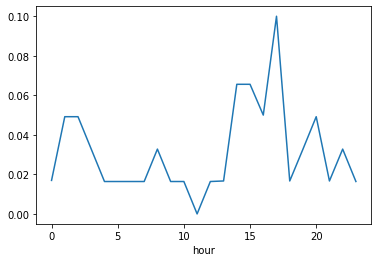

In [ ]:
df_train.groupby('hour').mean()['hour_bef_precipitation'].plot()

In [ ]:
df_train['hour_bef_precipitation'].fillna({934:0,1035:0},inplace=True)

In [ ]:
df_train.groupby('hour').mean()['hour_bef_visibility']

hour
0     1434.220339
1     1400.852459
2     1374.278689
3     1326.311475
4     1264.606557
5     1203.426230
6     1146.229508
7     1150.311475
8     1152.868852
9     1189.098361
10    1291.295082
11    1358.868852
12    1469.606557
13    1512.266667
14    1519.721311
15    1528.065574
16    1566.583333
17    1561.733333
18    1581.850000
19    1576.688525
20    1565.557377
21    1590.016667
22    1512.081967
23    1462.508197
Name: hour_bef_visibility, dtype: float64

In [ ]:
df_train[df_train['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
934,1420,0,14.788136,0.0,1.965517,58.169492,NaN,39.0
1035,1553,18,20.926667,0.0,3.838333,40.450000,NaN,1.0


In [ ]:
df_train['hour_bef_visibility'].fillna({934:1434.220339,1035:1581.850000},inplace=True)

In [ ]:
df_train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
count                     0
dtype: int64

In [ ]:
del df_test['hour_bef_ozone']
del df_test['hour_bef_pm10']
del df_test['hour_bef_pm2.5']

In [ ]:
df_test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      1
hour_bef_precipitation    1
hour_bef_windspeed        1
hour_bef_humidity         1
hour_bef_visibility       1
dtype: int64

In [ ]:
df_test[df_test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
653,1943,19,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test['hour_bef_temperature'].fillna(19.704918,inplace=True)
df_test['hour_bef_precipitation'].fillna(1,inplace=True)
df_test['hour_bef_windspeed'].fillna(3.595082,inplace=True)
df_test['hour_bef_humidity'].fillna(43.573770,inplace=True)
df_test['hour_bef_visibility'].fillna( 1576.688525,inplace=True)

In [ ]:
df_test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
dtype: int64

## 결측치 확인

In [ ]:
df_train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
count                     0
dtype: int64

In [ ]:
df_test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
dtype: int64

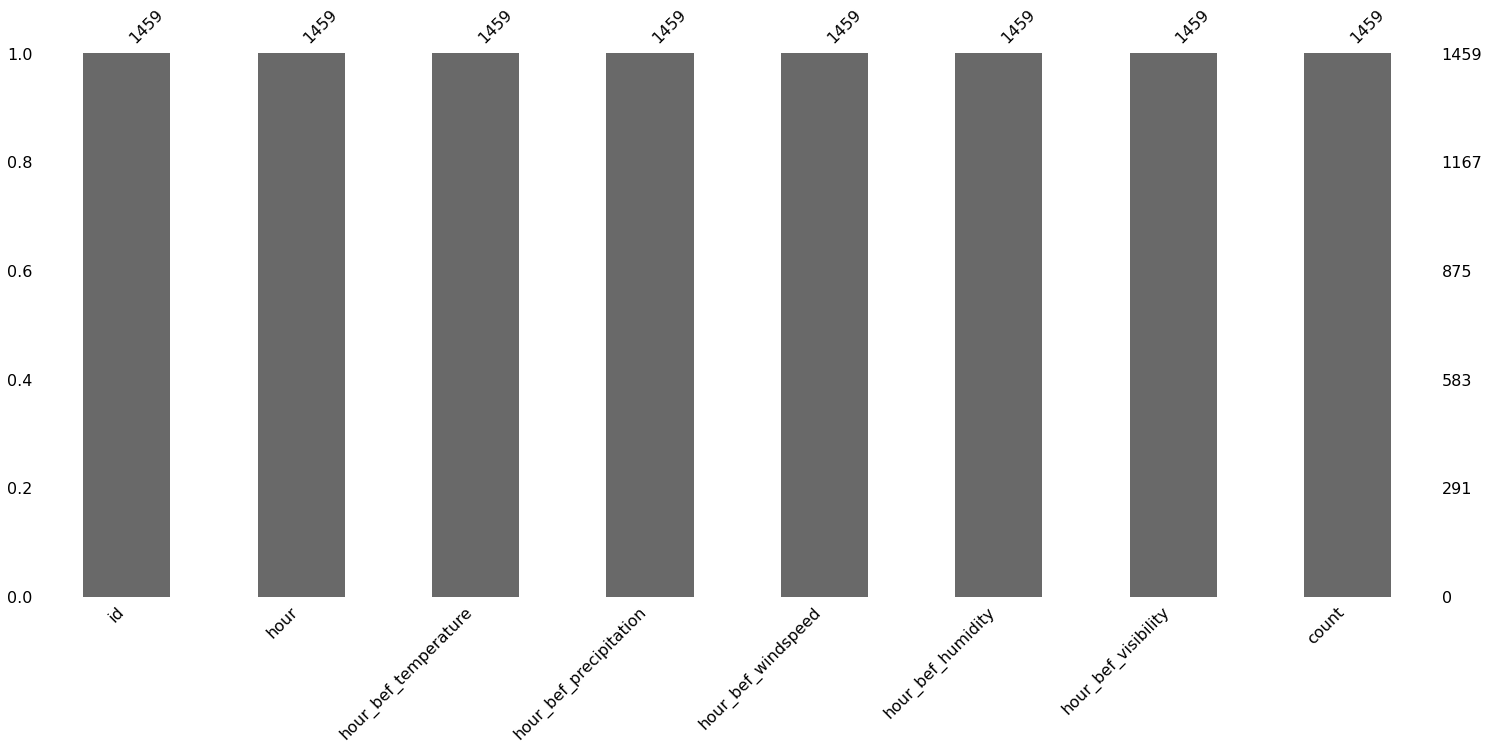

In [ ]:
msno.bar(df_train) #결측치가 사라진 모습. 

## 모델 학습

In [ ]:
train_x = df_train.drop(['count'],axis = 1)
train_y = df_train['count']

GridSearchCV

In [ ]:
def get_rmse(model):
    pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid , pred)
    rmse = np.sqrt(mse)
    print('RMSE:',np.round(rmse, 4))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [ ]:
input_var = list(df_train.columns[:])

input_var

#column list 확인

['id',
 'hour',
 'hour_bef_temperature',
 'hour_bef_precipitation',
 'hour_bef_windspeed',
 'hour_bef_humidity',
 'hour_bef_visibility',
 'count']

In [ ]:
X_features = df_train[input_var]
y_target = df_train['count']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 6))
    print('최적 alpha:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [84]:
import xgboost as xgb

xgb_params = {'n_estimators':[1000]}

xgb_reg = xgb.XGBRegressor(learning_rate=0.03, max_depth=5, min_split_loss=0,
             n_estimators=1000, n_jobs=-1, nthread=-1, random_state=7,
             reg_lambda=1.55, validate_parameters=1,colsample_bytree=1,reg_alpha=0)

best_xgb = get_best_params(xgb_reg, xgb_params)


[05:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적 평균 RMSE 값: 1.226243
최적 alpha: {'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[500]}

lgbm_reg = LGBMRegressor(n_estimators=500, bagging_fraction=1, learning_rate=0.03,
                         max_depth=4, subsample=0.7, feature_fraction=1, boosting_type='gbdt',
                         colsample_bytree=1, reg_lambda=5, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params) 

최적 평균 RMSE 값: 5.391177
최적 alpha: {'n_estimators': 500}


In [85]:
print(best_lgbm)
print(best_xgb)

LGBMRegressor(bagging_fraction=1, colsample_bytree=1, feature_fraction=1,
              learning_rate=0.03, max_depth=4, n_estimators=500, reg_lambda=5,
              subsample=0.7)
XGBRegressor(learning_rate=0.03, max_depth=5, min_split_loss=0,
             n_estimators=1000, n_jobs=-1, nthread=-1, random_state=7,
             reg_lambda=1.55, validate_parameters=1)


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor
model = RandomForestRegressor() #모델 선언해서

In [ ]:
model.fit(train_x,train_y) #우리 학습데이터로 학습 !    

RandomForestRegressor()

In [ ]:
RF_pred = np.expm1(model.predict(df_test)) #그리고 학습된 모델로 테스트데이터의 정보에 맞게 count를 예측해서 pred에 저장한거고 

 LightGBM

In [ ]:
lgbm_reg = LGBMRegressor(n_estimators=500, bagging_fraction=1, learning_rate=0.03,
                         max_depth=4, subsample=0.7, feature_fraction=1, boosting_type='gbdt',
                         colsample_bytree=1, reg_lambda=5, n_jobs=-1)
lgbm_reg.fit(train_x,train_y)


lgbm_pred = lgbm_reg.predict(df_test.values)

NameError: ignored

 XGBOOST

In [86]:
best_xgb

XGBRegressor(learning_rate=0.03, max_depth=5, min_split_loss=0,
             n_estimators=1000, n_jobs=-1, nthread=-1, random_state=7,
             reg_lambda=1.55, validate_parameters=1)

In [87]:
xgb_reg = xgb.XGBRegressor(learning_rate=0.03, max_depth=5, min_split_loss=0,
             n_estimators=1000, n_jobs=-1, nthread=-1, random_state=7,
             reg_lambda=1.55, validate_parameters=1)

In [88]:
xgb_reg.fit(train_x,train_y)

xgb_pred = xgb_reg.predict(df_test)

[06:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


앙상블(마무리 단계로 각 모델 성능 보고 섞을 예정)

In [ ]:
# ensemble = xgb_pred*0.n + lgbm_pred*0.n + RF_pred*0.n

마무리

In [89]:
sub['count'] = xgb_pred   # 이건 위에서 예측한 test데이터의 count를 우리가 제출할 submission 파일 형식에 맞게 넣어준거고

In [90]:
sub.to_csv('xgb_v2.csv',index=False) #형식에 맞게 준비한 데이터 프레임을 csv파일로 변환, 제출